In [22]:
import matplotlib
%matplotlib inline
from pylab import *
import networkx as nx
import random as rd

m,n,k = 5,6,4 

def initialize():
    global g
    g = nx.grid_2d_graph(m, n)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    #cla()
    nx.draw(g, pos = g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

MovieWriter imagemagick unavailable; using Pillow instead.


./tmprd0h3c5v.gif


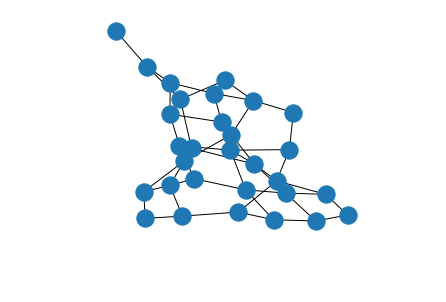

In [23]:
from celluloid import Camera
import time as tm
from IPython.display import HTML
import tempfile; tempfile.tempdir='./'
import matplotlib.pyplot as plt

fig = plt.figure()
camera = Camera(fig)

initialize()
nx.draw(g)
camera.snap()
for i in range(100):
    update()
    observe()
    camera.snap()


anim = camera.animate()

fname = tempfile.mktemp('.gif')
print(fname)
anim.save(fname, writer = 'imagemagick')
tm.sleep(0.1) # make sure file is saved
display(HTML("""
        <image style="width:200" src="{}" >
            """.format(fname)))

In [27]:
m0 = 5 # number of nodes in initial condition

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    #cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update(m):
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

<ipython-input-27-16de900825c1>:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  r = uniform(0, sum(g.degree(i) for i in nds))
MovieWriter imagemagick unavailable; using Pillow instead.


./tmp5w3i1ajt.gif


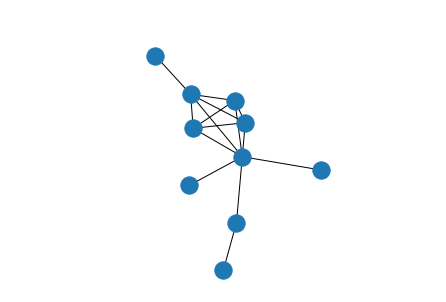

In [28]:
fig = plt.figure()
camera = Camera(fig)

initialize()
nx.draw(g)
camera.snap()
for i in range(100):
    update(1)
    observe()
    camera.snap()


anim = camera.animate()

fname = tempfile.mktemp('.gif')
print(fname)
anim.save(fname, writer = 'imagemagick')
tm.sleep(0.1) # make sure file is saved
display(HTML("""
        <image style="width:200" src="{}" >
            """.format(fname)))

<ipython-input-27-16de900825c1>:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  r = uniform(0, sum(g.degree(i) for i in nds))
MovieWriter imagemagick unavailable; using Pillow instead.


./tmp7wyvsqod.gif


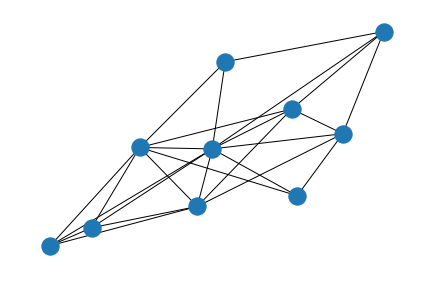

In [29]:
fig = plt.figure()
camera = Camera(fig)

initialize()
nx.draw(g)
camera.snap()
for i in range(100):
    update(3)
    observe()
    camera.snap()


anim = camera.animate()

fname = tempfile.mktemp('.gif')
print(fname)
anim.save(fname, writer = 'imagemagick')
tm.sleep(0.1) # make sure file is saved
display(HTML("""
        <image style="width:200" src="{}" >
            """.format(fname)))

<ipython-input-27-16de900825c1>:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  r = uniform(0, sum(g.degree(i) for i in nds))
MovieWriter imagemagick unavailable; using Pillow instead.


./tmpp6m77sis.gif


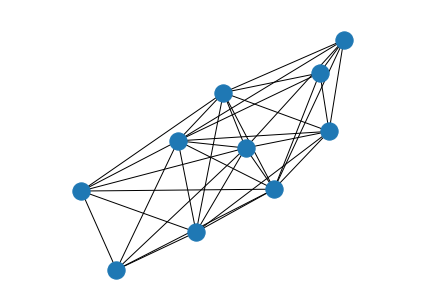

In [30]:
fig = plt.figure()
camera = Camera(fig)

initialize()
nx.draw(g)
camera.snap()
for i in range(100):
    update(5)
    observe()
    camera.snap()


anim = camera.animate()

fname = tempfile.mktemp('.gif')
print(fname)
anim.save(fname, writer = 'imagemagick')
tm.sleep(0.1) # make sure file is saved
display(HTML("""
        <image style="width:200" src="{}" >
            """.format(fname)))